In [7]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from imgaug import augmenters as iaa

In [8]:
dataset_path = '/home/linus/data-generator-notTrashCar/dataset_1551788916.5544326'

In [17]:
labels_file = json.loads(open(os.path.join(dataset_path, 'label.json'),'r').read())
len(labels_file)

7833

In [24]:
os.chdir('/home/linus/data-generator-notTrashCar/')

In [18]:
rgb_imgs = []
depth_imgs = []
angle_list = []
speed_list = []
for each_sample in tqdm(labels_file, desc='Reading images'):
    rgb_imgs.append(cv2.imread(each_sample['rgb_img_path']))
    depth_imgs.append(cv2.imread(each_sample['depth_img_path']))
    angle_list.append(each_sample['angle'])
    speed_list.append(each_sample['speed'])

Reading images: 100%|██████████| 7833/7833 [01:33<00:00,  6.15it/s] 


In [11]:
def show_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [12]:
augment_object = iaa.Sequential([
    iaa.Sometimes(0.5, iaa.AdditiveGaussianNoise(scale=0.03*255)),
    iaa.Sometimes(0.5, iaa.OneOf([
        iaa.GaussianBlur(sigma=0.5),
        iaa.MotionBlur(angle=(0,360))
    ])),
    iaa.GammaContrast(gamma=(0.5, 1.44)),
    iaa.Sometimes(0.3, iaa.OneOf([
        iaa.FastSnowyLandscape(lightness_threshold=(0,150)),
        iaa.Fog()
    ])),
])

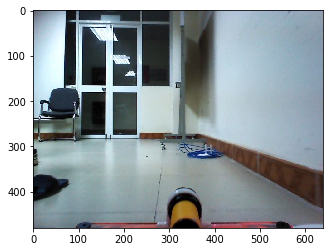

In [71]:
test_img = rgb_imgs[729]
show_img(test_img)

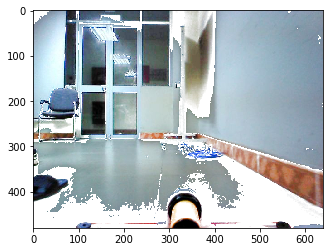

In [80]:
show_img(augment_object.augment_image(test_img))

(array([8.800e+01, 8.100e+01, 1.000e+00, 2.000e+00, 0.000e+00, 4.690e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 2.971e+03]),
 array([-60., -48., -36., -24., -12.,   0.,  12.,  24.,  36.,  48.,  60.]),
 <a list of 10 Patch objects>)

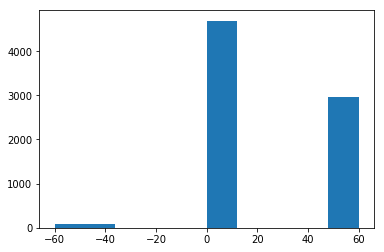

In [69]:
plt.hist(angle_list)

In [19]:
for each_sample in labels_file:
    if each_sample['speed']==0:
        labels_file.remove(each_sample)
len(labels_file)

7732

In [21]:
left = right = 0
for each_sample in labels_file:
    if each_sample['angle'] in range(-65,-20):
        left += 1
    elif each_sample['angle'] in range(40,65):
        right += 1
left, right

(152, 2971)

In [22]:
2791/152

18.361842105263158

In [25]:
import random

In [33]:
new_sample_list = []
for each_sample in tqdm(labels_file):
    if each_sample['angle'] in range(-65,-20):
        for index in range(random.randint(16, 18)):
            img = cv2.imread(each_sample['rgb_img_path'])
            img = augment_object.augment_image(img)
            old_path = each_sample['rgb_img_path'].split('/')[-1]
            json_path = each_sample['rgb_img_path'].replace('.jpg','_{}.jpg'.format(index))
            new_path = os.path.join('/home/linus/rgb/', old_path.replace('.jpg','_{}.jpg'.format(index)))
            cv2.imwrite(new_path, img)
            new_sample = {
                'index': each_sample['index'],
                'rgb_img_path':  json_path,
                'depth_img_path': each_sample['depth_img_path'],
                'angle': each_sample['angle'],
                'speed': each_sample['speed'],
                'proximity value': each_sample['proximity value']
            }
            new_sample_list.append(new_sample)
final_data = new_sample_list + labels_file

100%|██████████| 7732/7732 [01:00<00:00, 127.33it/s]


In [34]:
with open(os.path.join('/home/linus/', 'over_sampled_label.json'), 'w', encoding='utf-8') as outfile:
    json.dump(final_data, outfile, ensure_ascii=False,
              sort_keys=False, indent=4)
    outfile.write("\n")